## Assignment 7
Zuzanna Liberto <br>
11.14.2020 <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### 1. Data Prep

In [2]:
# read in the dataset
data = pd.read_csv("bank.csv", sep = ";")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [3]:
# check for NaN
data.isnull().sum().sum()

0

In [4]:
# check the datatypes of each column
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
# change each object column to category
for col in data:
    if data[col].dtype == np.object:
        data[col] = data[col].astype('category')
        
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [6]:
# select categorical columns
cat_cols = data.select_dtypes(['category']).columns
cat_cols

# change each categorical column into numerical
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)

data.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [7]:
# convert pandas dataframe to numpy array
np_data = data.to_numpy()

# separate x's and y's
x_vals = np_data[:,0:16]
y_vals = np_data[:,16]

# create test and train subsets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_vals, y_vals, test_size = 0.3)

### 2. Logistic regression

In [8]:
# initialize the model
logistic_model = LogisticRegression(C=1e6, max_iter = 7000)

#fit the model
logistic_model.fit(x_train, y_train)

# get the accuracy of the model
accuracy = logistic_model.score(x_test,y_test)
print("The accuracy of the logistic regression model is", round(accuracy,4))

The accuracy of the logistic regression model is 0.8968


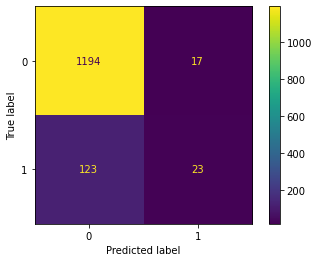

In [9]:
# plot the confusion matrix
plot_confusion_matrix(logistic_model, x_test, y_test) 
plt.show()

### 3. Linear regression

In [10]:
# this is a wrong model for this type of a problem (classification)

# initialize the model
linear_model = LinearRegression()

# fit the model
linear_model.fit(x_train, y_train)

# get the accuracy
accuracy = linear_model.score(x_test, y_test)
print("The accuracy (R^2) of the linear regression model is", round(accuracy,4))

The accuracy (R^2) of the linear regression model is 0.1767


In [11]:
# can't generate a confusion matrix because linear regression is for predicting a continous variable
# it's a wrong model for this particular problem
plot_confusion_matrix(linear_model, x_test, y_test) 
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

### 4. Decision Trees

In [12]:
# initialize the model
dt_model = DecisionTreeClassifier()

# fit the model
dt_model.fit(x_train, y_train)

# get the accuracy
accuracy = dt_model.score(x_test, y_test)
print("The accuracy of the Decision Trees model is", round(accuracy,4))

The accuracy of the Decision Trees model is 0.8696


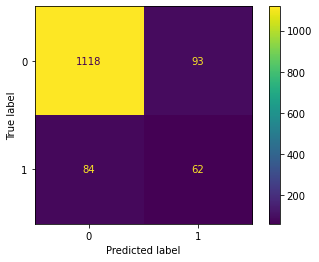

In [13]:
# plot the confusion matrix
plot_confusion_matrix(dt_model, x_test, y_test) 
plt.show()

### 5. KNN

In [14]:
# initialize the model
knn_model = KNeighborsClassifier(n_neighbors = 3)

# fit the model
knn_model.fit(x_train, y_train)

# get the accuracy
accuracy = knn_model.score(x_test, y_test)
print("The accuracy of the KNN model is", round(accuracy,4))

The accuracy of the KNN model is 0.8725


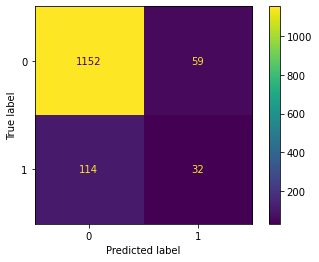

In [15]:
# plot the confusion matrix
plot_confusion_matrix(knn_model, x_test, y_test) 
plt.show()

### 6. SVM

In [16]:
# initialize the model
svm_model = SVC()

# fit the model
svm_model.fit(x_train, y_train)

# get the accuracy
accuracy = svm_model.score(x_test, y_test)
print("The accuracy of the SVM model is", round(accuracy,4))

The accuracy of the SVM model is 0.8924


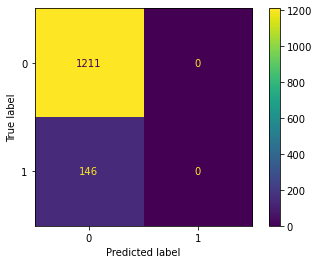

In [17]:
# plot the confusion matrix
plot_confusion_matrix(svm_model, x_test, y_test) 
plt.show()

### 7. Neural Network in Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix

In [19]:
# define the model
keras_model = Sequential()
keras_model.add(Dense(64, input_dim=16, activation='relu'))
keras_model.add(Dense(24, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

# compile the model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
keras_model.fit(x_train, y_train, epochs=120, batch_size=35, validation_data=(x_test, y_test))

# get predicted y values
y_pred = keras_model.predict_classes(x_test)


Epoch 1/120
91/91 [==============================] - 0s 4ms/step - loss: 11.3061 - accuracy: 0.7509 - val_loss: 0.7144 - val_accuracy: 0.8740
Epoch 2/120
91/91 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.8480 - val_loss: 0.8135 - val_accuracy: 0.8821
Epoch 3/120
91/91 [==============================] - 0s 2ms/step - loss: 1.2828 - accuracy: 0.8398 - val_loss: 0.6309 - val_accuracy: 0.8629
Epoch 4/120
91/91 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.8546 - val_loss: 0.9410 - val_accuracy: 0.8880
Epoch 5/120
91/91 [==============================] - 0s 2ms/step - loss: 0.9164 - accuracy: 0.8559 - val_loss: 0.9598 - val_accuracy: 0.8821
Epoch 6/120
91/91 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.8458 - val_loss: 0.7349 - val_accuracy: 0.8924
Epoch 7/120
91/91 [==============================] - 0s 2ms/step - loss: 0.9092 - accuracy: 0.8486 - val_loss: 0.5120 - val_accuracy: 0.8681
Epoch 8/120


In [20]:
_, acc = keras_model.evaluate(x_test, y_test)

print("\nThe accuracy of the neural network model is", round(acc, 4))

43/43 [==============================] - 0s 904us/step - loss: 0.3175 - accuracy: 0.8828

The accuracy of the neural network model is 0.8828


In [21]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1140,   71],
       [  88,   58]])

### Answer: In terms of accuracy, the best model is the logistic regression with the accuracy of 89.68% on the test data. The second best model would be SVM with the accuracy of 89.24%. The worst model is the linear regression and it has the lowest accuracy of 17.67%. It's also not suitable to use linear regression for a classficiation problem.